# Importing Important Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn 
import nltk
from nltk.corpus import stopwords

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Knowing the Data and Doing Simple Processing

In [2]:
pd.set_option('display.max_columns', None)
df=pd.read_csv(r'C:\Users\acer\Desktop\Internship\Project\Malignant-Comments-Classifier-Project--1-\Malignant Comments Classifier Project\train.csv')
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
df.shape

(159571, 8)

In [4]:
df.nunique()

id                  159571
comment_text        159571
malignant                2
highly_malignant         2
rude                     2
threat                   2
abuse                    2
loathe                   2
dtype: int64

In [5]:
# deleting the id as it is not required for the analysis or model building
df.drop(columns={"id"},inplace=True)

In [6]:
df.isna().sum()

comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [7]:
temp=df.columns
temp=temp[1:]
for i in temp:
    print(df[i].value_counts())

0    144277
1     15294
Name: malignant, dtype: int64
0    157976
1      1595
Name: highly_malignant, dtype: int64
0    151122
1      8449
Name: rude, dtype: int64
0    159093
1       478
Name: threat, dtype: int64
0    151694
1      7877
Name: abuse, dtype: int64
0    158166
1      1405
Name: loathe, dtype: int64


# EDA

In [8]:
# Lets see how many there are classified as highly malignant which are also malignant
count=0
index=[]
for i in range(len(df.malignant)):
    if  df.highly_malignant.iloc[i]==1 and df.malignant.iloc[i]==1:
        index.append(i)
        count+=1

In [9]:
# The count of malignant is 15294
# The count of highly_malignant is 1595
# The count of both is
count
# This implies that all the highly_malignant are malignant but not all the malignant are highly_malignant

1595

#### Venn Diagram

In [10]:
from matplotlib_venn import venn2

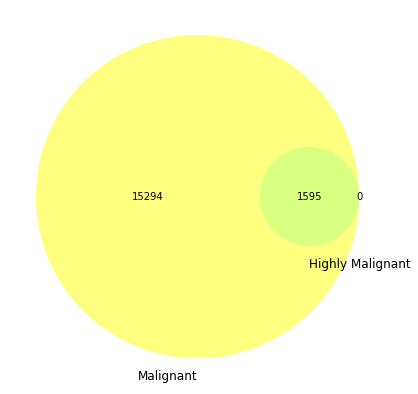

In [11]:
plt.figure(figsize=(7,7))
venn2(subsets=(15294,0,1595),
       set_labels=('Malignant', 'Highly Malignant'),
      set_colors=('yellow','green'),alpha=.5
     )
plt.show()

In [12]:
comments = df.drop(['comment_text'],axis = 1)
for i in comments.columns :
    print("Percent of {0}s: ".format(i), round(100*comments[i].mean(),2), "%")

Percent of malignants:  9.58 %
Percent of highly_malignants:  1.0 %
Percent of rudes:  5.29 %
Percent of threats:  0.3 %
Percent of abuses:  4.94 %
Percent of loathes:  0.88 %


#### Bar plot

In [13]:
classes = {}
for i in list(comments.columns):
    classes[i] =  comments[i].sum()
n_classes = [classes[i] for i in list(classes.keys())]
classes = list(classes.keys())

<Figure size 1440x1440 with 0 Axes>

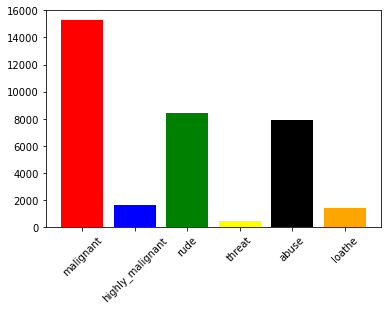

In [14]:
color = ['red','blue','green','yellow','black','orange']
plt.figure(figsize=(20,20))
fig, ax = plt.subplots()
ax.bar(classes,n_classes,color = color)
plt.xticks(rotation=45)
plt.show()

# Snowball Stemming

In [15]:
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')
sn = SnowballStemmer(language='english')

def stemmer(text):
    words =  text.split()
    train = [sn.stem(word) for word in words if not word in set(stopwords.words('english'))]
    return ' '.join(train)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
df.comment_text = df.comment_text.apply(stemmer)

In [17]:
df.comment_text.head()

0    explan whi edit made usernam hardcor metallica...
1    d'aww! he match background colour i'm seem stu...
2    hey man, i'm realli tri edit war. it guy const...
3    " more i can't make real suggest improv - i wo...
4       you, sir, hero. ani chanc rememb page that on?
Name: comment_text, dtype: object

# Text Cleaning

#### Now cleaning the text column

In [18]:
df["Old Length"]=df.comment_text.str.len()
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Old Length
0,explan whi edit made usernam hardcor metallica...,0,0,0,0,0,0,180
1,d'aww! he match background colour i'm seem stu...,0,0,0,0,0,0,99
2,"hey man, i'm realli tri edit war. it guy const...",0,0,0,0,0,0,130
3,""" more i can't make real suggest improv - i wo...",0,0,0,0,0,0,380
4,"you, sir, hero. ani chanc rememb page that on?",0,0,0,0,0,0,46


In [19]:
import neattext as ntx
import nltk
import string
from nltk.corpus import stopwords

In [25]:
import re
def  clean_text(text):
    text =  text.lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"\r", "", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "that is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"how's", "how is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"n'", "ng", text)
    text = re.sub(r"'bout", "about", text)
    text = re.sub(r"'til", "until", text)
    text = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", text)
    text = text.translate(str.maketrans('', '', string.punctuation)) 
    text = re.sub("(\\W)"," ",text) 
    text = re.sub('\S*\d\S*\s*','', text)
    
    return text

In [26]:
df.comment_text = df.comment_text.apply(clean_text)

In [27]:
df["New Length"]=df.comment_text.str.len()
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Old Length,New Length
0,explan whi edit usernam hardcor metallica fan ...,0,0,0,0,0,0,180,143
1,daww match background colour im stuck thanks t...,0,0,0,0,0,0,99,61
2,hey man im realli tri edit war guy constant re...,0,0,0,0,0,0,130,114
3,cant real suggest improv wonder section statis...,0,0,0,0,0,0,380,304
4,sir hero ani chanc rememb page,0,0,0,0,0,0,46,30


In [28]:
a=df["Old Length"].sum()
print("Original Length:",a)
b=df["New Length"].sum()
print("Cleaned Length:",b)
print("Percentage Data Left",(b/a)*100)

Original Length: 41704744
Cleaned Length: 34842501
Percentage Data Left 83.5456537030895


# Checking Loud Words For Each Column

In [29]:
from wordcloud import WordCloud

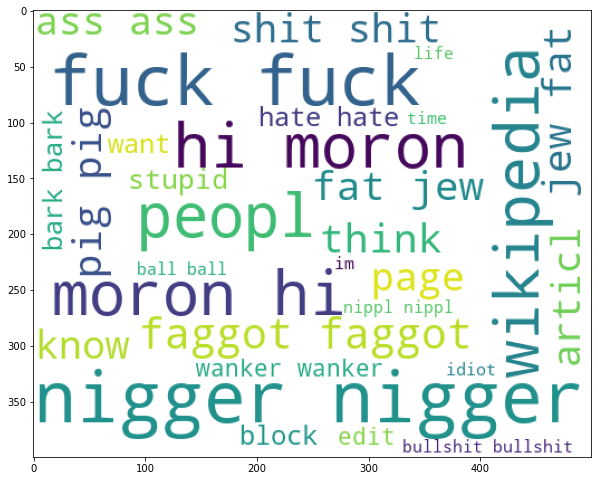

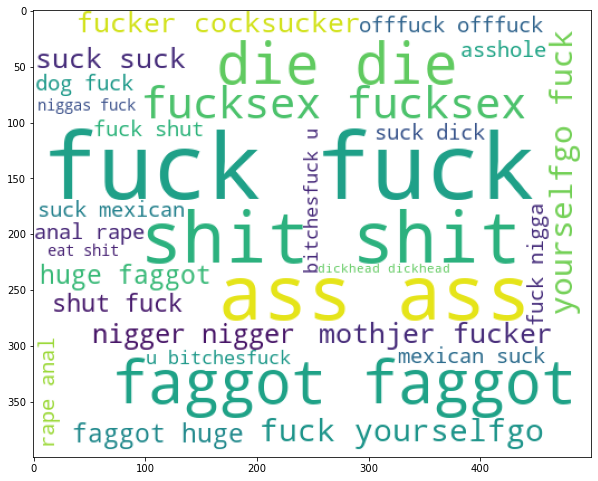

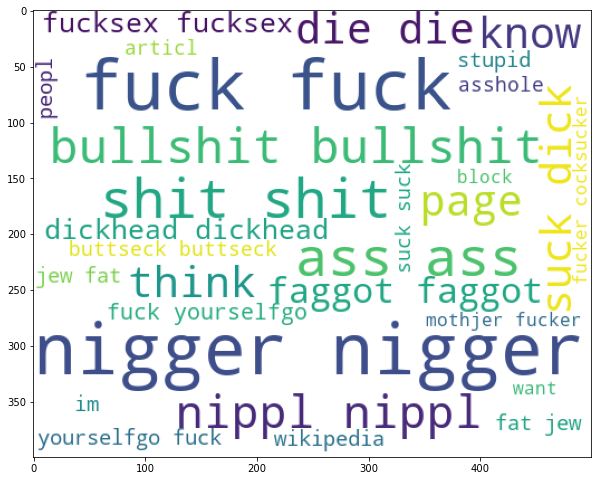

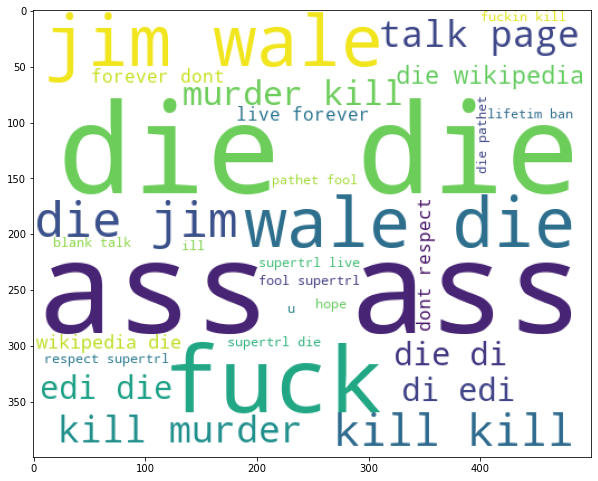

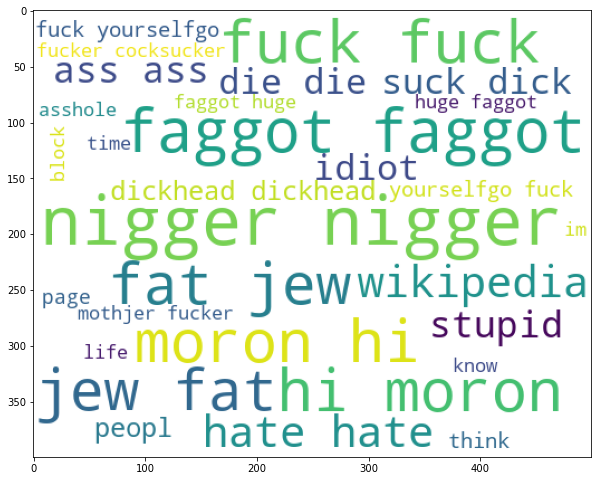

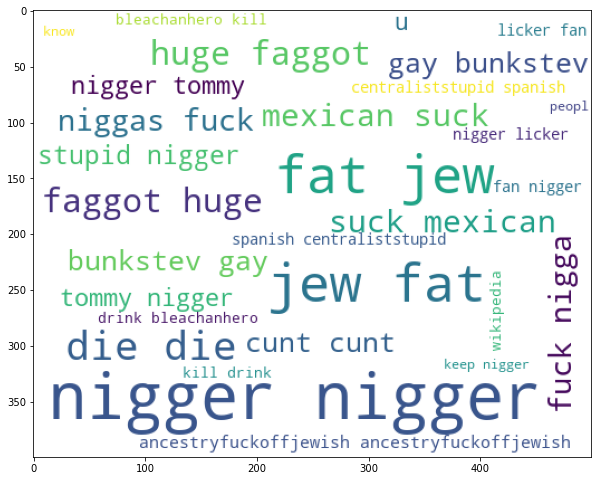

In [30]:
r1=df["comment_text"][df["malignant"]==1]
r1_cloud=WordCloud(width=500,height=400,max_words=30,background_color='white').generate(' '.join(r1))
plt.figure(figsize=(10,10))
plt.imshow(r1_cloud)

r2=df["comment_text"][df["highly_malignant"]==1]
r2_cloud=WordCloud(width=500,height=400,max_words=30,background_color='white').generate(' '.join(r2))
plt.figure(figsize=(10,10))
plt.imshow(r2_cloud)

r3=df["comment_text"][df["rude"]==1]
r3_cloud=WordCloud(width=500,height=400,max_words=30,background_color='white').generate(' '.join(r3))
plt.figure(figsize=(10,10))
plt.imshow(r3_cloud)

r4=df["comment_text"][df["threat"]==1]
r4_cloud=WordCloud(width=500,height=400,max_words=30,background_color='white').generate(' '.join(r4))
plt.figure(figsize=(10,10))
plt.imshow(r4_cloud)

r5=df["comment_text"][df["abuse"]==1]
r5_cloud=WordCloud(width=500,height=400,max_words=30,background_color='white').generate(' '.join(r5))
plt.figure(figsize=(10,10))
plt.imshow(r5_cloud)

r5=df["comment_text"][df["loathe"]==1]
r5_cloud=WordCloud(width=500,height=400,max_words=30,background_color='white').generate(' '.join(r5))
plt.figure(figsize=(10,10))
plt.imshow(r5_cloud)

# Data Splitting 

In [31]:
x=df.comment_text
y=df.drop(["comment_text","Old Length","New Length"],axis=1)

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size = 0.1,random_state = 7)

In [33]:
x_train

155593           i get full name writ i approach him thanks
39466     happi discuss futur reference clear cite suppo...
63958     thank help plot onc time west time favorit exp...
19223     thank knowledge disallow dismiss technic mathe...
154315     hi james appreci advice always i give serious...
                                ...                        
66455     polit process new essay democrat thought h geo...
53459                               thank ill sure let know
10742                                     tag right pm june
49689     probabl reliable sourc recurring httpwwwboldbe...
61615     simpli assum someth incorrect heard argument i...
Name: comment_text, Length: 143613, dtype: object

In [34]:
y_train

,malignant,highly_malignant,rude,threat,abuse,loathe
155593,0,0,0,0,0,0
39466,0,0,0,0,0,0
63958,0,0,0,0,0,0
19223,0,0,0,0,0,0
154315,0,0,0,0,0,0
...,...,...,...,...,...,...
66455,0,0,0,0,0,0
53459,0,0,0,0,0,0
10742,0,0,0,0,0,0
49689,0,0,0,0,0,0


# Vectorization

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
word_vectorizer = TfidfVectorizer(
    strip_accents='unicode',     
    analyzer='word',            
    token_pattern=r'\w{1,}',    
    ngram_range=(1,3),         
    stop_words='english',
    sublinear_tf=True)

word_vectorizer.fit(x_train)    
train_word_features = word_vectorizer.transform(x_train)

In [36]:
X_train_transformed = word_vectorizer.transform(x_train)
X_test_transformed = word_vectorizer.transform(x_test)

In [37]:
print(X_train_transformed)

  (0, 5652882)	0.49983718431170093
  (0, 5652881)	0.49983718431170093
  (0, 5652878)	0.38607320200789547
  (0, 4985953)	0.18317214187669684
  (0, 286974)	0.49983718431170093
  (0, 285884)	0.2605452296046236
  (1, 5294075)	0.20533671506544673
  (1, 5294074)	0.20533671506544673
  (1, 5274823)	0.05172599372842047
  (1, 4842727)	0.20533671506544673
  (1, 4842711)	0.16146548884630355
  (1, 4836560)	0.07666371008329421
  (1, 4601760)	0.20533671506544673
  (1, 4601734)	0.14470002032316626
  (1, 4596286)	0.07277318024840992
  (1, 4536310)	0.20533671506544673
  (1, 4536309)	0.20533671506544673
  (1, 4536294)	0.1766012920069444
  (1, 4507561)	0.20533671506544673
  (1, 4507560)	0.20533671506544673
  (1, 4506485)	0.08965730596244144
  (1, 4079241)	0.20533671506544673
  (1, 4079240)	0.1898916167867821
  (1, 4079093)	0.1072077606684579
  (1, 2138811)	0.20533671506544673
  :	:
  (143611, 4122409)	0.18849396624308498
  (143611, 4054073)	0.3330955089236404
  (143611, 4054072)	0.30804059913866755
  (143

# Model Selection And Building

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.metrics import roc_auc_score , accuracy_score , confusion_matrix , f1_score

log_reg = LogisticRegression(C = 10, penalty='l2', solver = 'liblinear', random_state=7)

classifier = OneVsRestClassifier(log_reg)
classifier.fit(X_train_transformed, y_train)


y_train_pred_proba = classifier.predict_proba(X_train_transformed)
y_test_pred_proba = classifier.predict_proba(X_test_transformed)


roc_auc_score_train = roc_auc_score(y_train, y_train_pred_proba,average='weighted')
roc_auc_score_test = roc_auc_score(y_test, y_test_pred_proba,average='weighted')

print("ROC AUC Score Train:", roc_auc_score_train)
print("ROC AUC Score Test:", roc_auc_score_test)

ROC AUC Score Train: 0.9998364864278017
ROC AUC Score Test: 0.9781785111444917


In [39]:
def make_test_predictions(df,classifier):
    df.comment_text = df.comment_text.apply(clean_text)
    df.comment_text = df.comment_text.apply(stemmer)
    X_test = df.comment_text
    X_test_transformed = word_vectorizer.transform(X_test)
    y_test_pred = classifier.predict_proba(X_test_transformed)
    return y_test_pred

# Testing the Model

In [46]:
xx ={'comment_text':['Shut up your mouth bitch!!!']}
xx = pd.DataFrame(xx)

In [47]:
make_test_predictions(xx,classifier)

array([[0.99999993, 0.89121635, 0.99997681, 0.01445361, 0.99996719,
        0.12357749]])

In [48]:
xx ={'comment_text':['I wish yoou happiness!!!']}
xx = pd.DataFrame(xx)

In [49]:
make_test_predictions(xx,classifier)

array([[0.00823128, 0.00190205, 0.00972206, 0.00222946, 0.00804752,
        0.00141699]])

# Saving The Model

In [52]:
import joblib
joblib.dump(classifier,r"C:\Users\acer\Desktop\Internship\Project\Malignant-Comments-Classifier-Project--1-\Malignant Comments Classifier Project\commentDetection.pkl")

['C:\\Users\\acer\\Desktop\\Internship\\Project\\Malignant-Comments-Classifier-Project--1-\\Malignant Comments Classifier Project\\commentDetection.pkl']

# Predicting for TEST dataset

## Importing the dataset

In [8]:
pd.set_option('display.max_columns', None)
test_df=pd.read_csv(r'C:\Users\acer\Desktop\Internship\Project\Malignant-Comments-Classifier-Project--1-\Malignant Comments Classifier Project\test.csv')
test_df.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


## Preprocessing

In [10]:
y_pred=make_test_predictions(test_df,classifier)
y_pred_df = pd.DataFrame(y_pred,columns=y.columns)
y_pred_df

,malignant,highly_malignant,rude,threat,abuse,loathe
0,0.999998,0.540861,0.999986,0.043691,0.999528,0.766961
1,0.004146,0.001562,0.002652,0.000992,0.004748,0.001822
2,0.009685,0.001765,0.004787,0.000649,0.005340,0.001341
3,0.001098,0.000717,0.000839,0.000520,0.000904,0.000400
4,0.005913,0.000549,0.001829,0.000284,0.003003,0.000349
...,...,...,...,...,...,...
153159,0.035491,0.001645,0.007082,0.000839,0.017066,0.002962
153160,0.054383,0.003133,0.018440,0.005330,0.037321,0.008261
153161,0.002280,0.000686,0.001567,0.000588,0.001665,0.000862
153162,0.008448,0.001334,0.008097,0.001726,0.007457,0.018986


In [2]:
y_pred_df.to_csv(r'C:\Users\acer\Desktop\Internship\Project\Malignant-Comments-Classifier-Project--1-\Malignant Comments Classifier Project\test_dataset_solutions.csv', index=False)

# TO SAVE THE PROGRESS OF THE SESSOIN OF JUPITER NOTEBOOK

In [11]:
import dill
dill.dump_session('notebook_env.db')

In [1]:
import dill
dill.load_session('notebook_env.db')